In [ ]:
!pip install hazm

In [ ]:
import pandas as pd
import numpy as np
import hazm
import sklearn
import pickle
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CI_test.csv')
print(set(df["recommend"]))

{'not_recommended', 'recommended'}


In [ ]:
df

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,not_recommended
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",recommended
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",recommended
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",recommended
...,...,...,...,...,...,...,...,...,...,...
48077,842976,لیوان گامین گلس مدل محک بسته 6 عددی,2333505,10,1,بی کیفیت,کاملابی کیفیت، تو هر قیمتی اصلا ارزش خرید نداره,NaN,NaN,not_recommended
48078,362029,کتاب سفید و قرمز نسخه بارسلونا,8369747,0,0,عالی بود خون دن داره,عالیییییییییییییییییییی,NaN,NaN,recommended
48079,818381,بالش بادی پورگونر مدل KMG,8027276,0,0,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,NaN,NaN,not_recommended
48080,549845,شید آباژور آرام مدل SH45/01,4979401,0,0,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]",recommended


In [ ]:
df_test

,id,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages
0,1,146879,فلاسک غذا خودرو بلک اند دکر مدل BDV212F,2838703,15,12,فقط مناسب سفر طولانی,با توجه به قدرت خنک کنندگی حداقل ۲ ساعت زمان ل...,NaN,NaN
1,2,120648,ادو تویلت مردانه آنتونیو باندراس مدل The Golde...,1307120,5,3,خوش بو,بسیار خوش بو ولی ماندگاری در حد یک ساعت ، با ا...,NaN,NaN
2,3,76932,محلول تقویت و رشد ابرو لامینین 12ml,2724686,8,3,بدون فایده,اصلا تأثیری نداشت,NaN,NaN
3,4,179072,فن هیتر فلر مدل HFC201,2499534,5,0,NaN,کیفیت بدنه خیلی خوبی داره._x000D_\nوقتی در جای...,NaN,NaN
4,5,184047,گوشی موبایل آنر مدل 6X BLN-L21 دو سیم‌ کارت,906159,19,4,فوق العاده در یک کلام,دو ساله استفاده میکنم، واقعاً هیچ کجا برام کم ...,"[""حسگر فوق‌العاده اثرانگشت \r"",""قابلیت تنظیم ف...",NaN
...,...,...,...,...,...,...,...,...,...,...
4995,4996,106518,بخار شوی کرشر مدل SC2 Premium,4477666,0,1,خریدشو پبشنهاد میکنم,من از دی جی کالا خریدم خیلی عالیه._x000D_\nپیش...,"[""قدرت پرتاب بخار بالا""]","[""به نظر من نداره""]"
4996,4997,326261,ظرف نگهدارنده رویچن مدل Crystal Kankan بسته10 ...,1390121,2,0,کاربردی و خوب,خیلی خوبه._x000D_\nاندازه هاش کاربردی و عالیه,NaN,NaN
4997,4998,195433,کرم براق کننده موی سر مدل A Plus E مقدار 120 گرم,2359378,0,0,یه جنس ایرانی خوب,چرب کردن مو باعث جلوگیری از سفیدی زودرس و پیری...,"[""بوی مطبوع و خوب\r"",""حجم زیاد \r"",""چربی کم و ...","[""ضعف آنچنانی ندارد""]"
4998,4999,590683,کاور کوالا مدل Round TPU مناسب برای گوشی موبای...,7622063,0,0,خرابی,بعداز یک ماه زرد میشه از هم در میره,"[""طراحی خوب""]","[""رنگ رفتن \r"",""خراب شدن""]"


In [ ]:
df = pd.DataFrame(df, columns=["title", "comment","recommend"])
df_test = pd.DataFrame(df_test, columns=["title", "comment","recommend"])

In [ ]:
df_test

,title,comment,recommend
0,فقط مناسب سفر طولانی,با توجه به قدرت خنک کنندگی حداقل ۲ ساعت زمان ل...,NaN
1,خوش بو,بسیار خوش بو ولی ماندگاری در حد یک ساعت ، با ا...,NaN
2,بدون فایده,اصلا تأثیری نداشت,NaN
3,NaN,کیفیت بدنه خیلی خوبی داره._x000D_\nوقتی در جای...,NaN
4,فوق العاده در یک کلام,دو ساله استفاده میکنم، واقعاً هیچ کجا برام کم ...,NaN
...,...,...,...
4995,خریدشو پبشنهاد میکنم,من از دی جی کالا خریدم خیلی عالیه._x000D_\nپیش...,NaN
4996,کاربردی و خوب,خیلی خوبه._x000D_\nاندازه هاش کاربردی و عالیه,NaN
4997,یه جنس ایرانی خوب,چرب کردن مو باعث جلوگیری از سفیدی زودرس و پیری...,NaN
4998,خرابی,بعداز یک ماه زرد میشه از هم در میره,NaN


In [ ]:
nan_value = float("NaN")
df_test.replace(nan_value, "", inplace=True)
df.replace(nan_value, "", inplace=True)

In [ ]:
df

,title,comment,recommend
0,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
1,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
2,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,recommended
3,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended
4,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,recommended
...,...,...,...
48077,بی کیفیت,کاملابی کیفیت، تو هر قیمتی اصلا ارزش خرید نداره,not_recommended
48078,عالی بود خون دن داره,عالیییییییییییییییییییی,recommended
48079,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,not_recommended
48080,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,recommended


In [ ]:
Y = df["recommend"].values

In [ ]:
print(Y)
print(set(Y))

['recommended' 'not_recommended' 'recommended' ... 'not_recommended'
 'recommended' 'recommended']
{'not_recommended', 'recommended'}


In [ ]:
print(len(df))

48082


In [ ]:
import re
data_train = np.asarray(df)
data_test = np.asarray(df_test)
stopwords  = hazm.stopwords_list()
normalizer = hazm.Normalizer(persian_numbers=False)
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()
puncList   = ["_", ".", ";", ":", "!", "?", "/", "\\", ",", "#", "@", "$", "&", ")", "(", "\"", "\'\'"]
stopwords.append(puncList)
set_words = []

In [ ]:
def remove(data):
  for i in range(len(data)):
    for j in range(len(data[i]) - 1):
      data[i][j] = normalizer.normalize(data[i][j])
      data[i][j] = re.sub('[0-9]+',' ',data[i][j])
      data[i][j] = re.sub('[۰-۹]+', ' ', data[i][j])
      data[i][j] = re.sub('\n',' ',data[i][j])
      data[i][j] = re.sub('\r',' ',data[i][j])
      data[i][j] = re.sub('[^\w\s]',' ',data[i][j])
      data[i][j] = re.sub('[A-Za-z]',' ',data[i][j])
      data[i][j] = re.sub('\_',' ',data[i][j])
      data[i][j] = re.sub('_x000D_\n', ' ', data[i][j])
      data[i][j] = stemmer.stem(data[i][j])
      data[i][j] = lemmatizer.lemmatize(data[i][j])
      data[i][j] = re.sub('#',' ',data[i][j])
      set_words.append(data[i][j].split(' '))
      data[i][j] =  ' '.join(data[i][j].split())
      data[i][j] =  ' '.join(word for word in data[i][j].split() if word not in stopwords )
    
remove(data_train)
remove(data_test)
print(data_train)

[['واقعا عالیه'
  'سلام نظرم بگم میخواستم موضوع اشاره نظراتی کالاها ثبت میکنیم هستن مردم عزیز استناد نظرات کالا خریداری میکنن بهتره ک کارشناسی الکی ندیم سال پاور بانک دارم نفر اشنا خریدم پیشنهاد خریدم واقعا عالیه گذشت سال هنوزم ایفون شارژ میکنه زمان شارژ دوستان کابل پاور شارژ ساعت فول میشه کابل دیگه ای وصل ساعت میکشه همزمان پاور همسرم خریدم اونم درومد افت کمتر بازدهی شارژ داره تجربه اطرافیانم ک شیائومی کالایی ک میخرید اصل باشه فیک داره واقعا شیائومی حرف میزنه برند گرونه هفته دیجی خریدم اونم واقعا سبک عالیه بازدهی بالایی داره خروجی هوشمند داره مجموع امپر میده حداکثر خروجی میده ببخشید طولانی'
  'recommended']
 ['سخت حوله میاد'
  'گیره های فلزی سخت میشوند حوله سخت توان مهسان یه مدل دیگه داره پلاستیکی هست ساده راحت خم نظرم تولید طرح متوقف کنن گیره های آهنی سفت هستن خواستم خمشون پایه پلاستیکیش شکست بلا استفاده'
  'not_recommended']
 ['اقرار ایراد گرفتن'
  'سلام دوستان منم مثه دوستان خرید تحقیق لپ تاپ انجام دادم نتیجه رسیدم مدل های مشابه شرکت شرکت های دیگه واقعا بهتره تحقیق اون ویدیو دوستامو

In [ ]:
print(Y)
print(set(Y))

['recommended' 'not_recommended' 'recommended' ... 'not_recommended'
 'recommended' 'recommended']
{'not_recommended', 'recommended'}


In [ ]:
print(data_test)

[['سفر طولان'
  'توجه قدرت خنک کنندگی ساعت زمان داره یکم خنک کنه گرم کن ساع' '']
 ['خوش بو' 'خوش بو ماندگاری ساعت قیمت اصلا ابدا ارزش نداره' '']
 ['فایده' 'اصلا تأثیری ندا' '']
 ...
 ['یه جنس ایرانی'
  'چرب مو جلوگیری سفیدی زودرس پیری مو میشه یه کالای ایرانی مواد مغزی مطمئن استفاده همون کار بوی خوبش روغن مناسبش چرب کیفیت بهم'
  '']
 ['خراب' 'بعداز ماه زرد میشه میره' '']
 ['سلا' 'قیمت ارزون خریدم کیفیت کارایی دریچه اتوماتیکش عالیییه' '']]


In [ ]:
dataset_train = df["title"] + ' ' + df["comment"]
dataset_test = df_test["title"] + ' ' + df_test["comment"]

In [ ]:
dataset_train

0        واقعا عالیه سلام نظرم بگم میخواستم موضوع اشاره...
1        سخت حوله میاد گیره های فلزی سخت میشوند حوله سخ...
2        اقرار ایراد گرفتن سلام دوستان منم مثه دوستان خ...
3         سالی هست اسپیکرو خریدم واقعا حرف نداره برندای...
4        هارد کیفیت ظاهر شیک هارد خریدم استفاده سنگینی ...
                               ...                        
48077         کیف کاملابی کیفیت قیمتی اصلا ارزش خرید نداره
48078                     خون دن داره عالییییییییییییییییی
48079    ارزش خرید نداره اندازه بالش هست بدرد بچه میخور...
48080                              تمیز زیبا تمیز زیبا راض
48081                                خوبه غلیظه واکس خوبیه
Length: 48082, dtype: object

In [ ]:
labelencoder = preprocessing.LabelEncoder()
y_train = labelencoder.fit_transform(Y)

In [ ]:
print(set(y_train))
print(set(Y))

{0, 1}
{'not_recommended', 'recommended'}


In [ ]:
dataset_train.shape

(48082,)

In [ ]:
dataset_train[0]

'واقعا عالیه سلام نظرم بگم میخواستم موضوع اشاره نظراتی کالاها ثبت میکنیم هستن مردم عزیز استناد نظرات کالا خریداری میکنن بهتره ک کارشناسی الکی ندیم سال پاور بانک دارم نفر اشنا خریدم پیشنهاد خریدم واقعا عالیه گذشت سال هنوزم ایفون شارژ میکنه زمان شارژ دوستان کابل پاور شارژ ساعت فول میشه کابل دیگه ای وصل ساعت میکشه همزمان پاور همسرم خریدم اونم درومد افت کمتر بازدهی شارژ داره تجربه اطرافیانم ک شیائومی کالایی ک میخرید اصل باشه فیک داره واقعا شیائومی حرف میزنه برند گرونه هفته دیجی خریدم اونم واقعا سبک عالیه بازدهی بالایی داره خروجی هوشمند داره مجموع امپر میده حداکثر خروجی میده ببخشید طولانی'

In [ ]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    ngram_range=(1, 2)
    )
X_train = vectorizer.fit_transform(dataset_train)

x_test = vectorizer.transform(dataset_test)

In [ ]:
print(X_train)

  (0, 62739)	0.07893833717671006
  (0, 332045)	0.08896562350071428
  (0, 138014)	0.08319274788493813
  (0, 130190)	0.08656966364149474
  (0, 332172)	0.0923425392572709
  (0, 32678)	0.0923425392572709
  (0, 297974)	0.0923425392572709
  (0, 160333)	0.07893833717671006
  (0, 396059)	0.0923425392572709
  (0, 138033)	0.0923425392572709
  (0, 159387)	0.08079678802571859
  (0, 60338)	0.04947163653855329
  (0, 54715)	0.0923425392572709
  (0, 255777)	0.0923425392572709
  (0, 216392)	0.07981583212838153
  (0, 399541)	0.07675323665654075
  (0, 42874)	0.08656966364149474
  (0, 183392)	0.057200373459073396
  (0, 391777)	0.07675323665654075
  (0, 467796)	0.0923425392572709
  (0, 76786)	0.0923425392572709
  (0, 334986)	0.0923425392572709
  (0, 130848)	0.07741987226916199
  (0, 239690)	0.0923425392572709
  (0, 399613)	0.0923425392572709
  :	:
  (48079, 421981)	0.2059769095605146
  (48079, 60472)	0.2303779288988988
  (48079, 139036)	0.15697904777520372
  (48079, 35899)	0.13356149906640657
  (48079, 118

In [ ]:
print(x_test)

  (0, 478138)	0.13536617542318882
  (0, 467148)	0.2902186992328331
  (0, 466890)	0.16041011248578382
  (0, 452925)	0.12634378394307433
  (0, 452771)	0.18440326049302502
  (0, 451194)	0.14029917704216777
  (0, 275741)	0.2788978270350929
  (0, 275641)	0.15008651438191856
  (0, 251872)	0.27086554038284955
  (0, 222289)	0.1882897426818092
  (0, 212143)	0.24671420098191083
  (0, 211757)	0.121355300019492
  (0, 211717)	0.21703744402806197
  (0, 204730)	0.27086554038284955
  (0, 204618)	0.14981097885996209
  (0, 161322)	0.22390965317298336
  (0, 158549)	0.07363635255442957
  (0, 145031)	0.2675769548373528
  (0, 145028)	0.2426209284366732
  (0, 144897)	0.30391544534013465
  (0, 112451)	0.2839883736742054
  (0, 112103)	0.12405438460666335
  (1, 352871)	0.1049875166622974
  (1, 292537)	0.2726348908889483
  (1, 292437)	0.16333395347665552
  :	:
  (4997, 47900)	0.18121655692584906
  (4997, 17981)	0.18161917315716095
  (4997, 16328)	0.058665534434402505
  (4998, 337672)	0.4614514642495851
  (4998, 

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
accuracy_list = []

In [ ]:
for c in range(1, 13):
  LSVC = LinearSVC(C=c)
  LSVC.fit(X_train,y_train)
  y2_LSVC_model = LSVC.predict(X_valid)
  score = accuracy_score(y_valid, y2_LSVC_model)
  accuracy_list.append(score)
  print(f"{c} LSVC Accuracy :{score}")

1 LSVC Accuracy :0.9260684205053551
2 LSVC Accuracy :0.9250285951960071
3 LSVC Accuracy :0.9243007174794634
4 LSVC Accuracy :0.9240927524175938
5 LSVC Accuracy :0.9236768222938546
6 LSVC Accuracy :0.9230529271082458
7 LSVC Accuracy :0.922948944577311
8 LSVC Accuracy :0.9227409795154414
9 LSVC Accuracy :0.9227409795154414
10 LSVC Accuracy :0.9225330144535718
11 LSVC Accuracy :0.9222210668607674
12 LSVC Accuracy :0.9219091192679629


In [ ]:
accuracy_list = np.asarray(accuracy_list)
print(accuracy_list.shape)

(12,)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

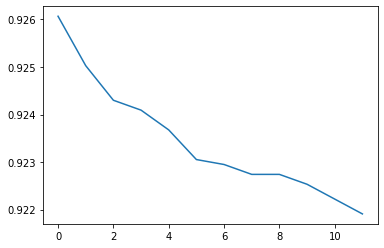

In [ ]:
x = np.arange(0, 12)
plt.plot(x, accuracy_list);

In [ ]:
DF = pd.DataFrame({"C" : [i for i in range(1, 13)], "accuracy" : accuracy_list})
DF.to_csv("Accuracy_CommentAndTitleWithLSS.csv", index=False)

In [ ]:
c = 1
LSVC = LinearSVC(C=c)
LSVC.fit(X_train,y_train)
y2_LSVC_model = LSVC.predict(X_valid)
score = accuracy_score(y_valid, y2_LSVC_model)
print(score)

0.9260684205053551


In [ ]:
predictions = LSVC.predict(x_test)
print(predictions[0:20])
predictions__test = labelencoder.inverse_transform(predictions)
list=[i+1 for i in range(len(predictions__test))]

DF = pd.DataFrame({"Id" : list, "recommend" : predictions__test})

DF.to_csv(f"SubmissionTC{c}WithLSSpace.csv", index=False)

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1]


In [ ]:
X_train.shape

(38465, 479119)

In [ ]:
x_test.shape

(5000, 479119)

In [ ]:
def benchmark(clf):
  print("**", clf, "**")
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_valid)
  score = accuracy_score(y_valid, prediction)
  print("accuracy:  {0:0.3f}".format(score*100))

results = []
clf = PassiveAggressiveClassifier(loss='hinge', random_state=0, class_weight=None, average=True, n_jobs=4)
name = "Passive-Aggressive-Classifier"
print(name)
results.append(benchmark(clf))

Passive-Aggressive-Classifier
** PassiveAggressiveClassifier(average=True, n_jobs=4, random_state=0) **
accuracy:  92.659


In [ ]:
predictions = clf.predict(x_test)
print(predictions[0:20])
predictions__test = labelencoder.inverse_transform(predictions)
list=[i+1 for i in range(len(predictions__test))]

DF = pd.DataFrame({"Id" : list, "recommend" : predictions__test})

DF.to_csv(f"clf SubmissionTC{c}WithLSSpace.csv", index=False)

[1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1]


In [ ]:
set_xtrain = set()
for i in range(len(set_words)):
  for j in range(len(set_words[i])):
    set_xtrain.add(set_words[i][j])

In [ ]:
print(len(set_xtrain))

40901


In [ ]:
print(len(set_words))

106164


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
raw_data

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,not_recommended
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",recommended
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",recommended
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",recommended
...,...,...,...,...,...,...,...,...,...,...
48077,842976,لیوان گامین گلس مدل محک بسته 6 عددی,2333505,10,1,بی کیفیت,کاملابی کیفیت، تو هر قیمتی اصلا ارزش خرید نداره,NaN,NaN,not_recommended
48078,362029,کتاب سفید و قرمز نسخه بارسلونا,8369747,0,0,عالی بود خون دن داره,عالیییییییییییییییییییی,NaN,NaN,recommended
48079,818381,بالش بادی پورگونر مدل KMG,8027276,0,0,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,NaN,NaN,not_recommended
48080,549845,شید آباژور آرام مدل SH45/01,4979401,0,0,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]",recommended


In [ ]:
# y_train = OneHotEncoder.fit_transform(Y)
# raw_data["recommend"] = OneHotEncoder().fit(raw_data["recommend"].asarray().reshape(-1,1))

In [ ]:
raw_data

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,not_recommended
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",recommended
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",recommended
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",recommended
...,...,...,...,...,...,...,...,...,...,...
48077,842976,لیوان گامین گلس مدل محک بسته 6 عددی,2333505,10,1,بی کیفیت,کاملابی کیفیت، تو هر قیمتی اصلا ارزش خرید نداره,NaN,NaN,not_recommended
48078,362029,کتاب سفید و قرمز نسخه بارسلونا,8369747,0,0,عالی بود خون دن داره,عالیییییییییییییییییییی,NaN,NaN,recommended
48079,818381,بالش بادی پورگونر مدل KMG,8027276,0,0,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,NaN,NaN,not_recommended
48080,549845,شید آباژور آرام مدل SH45/01,4979401,0,0,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]",recommended


In [ ]:
def clean_data(raw_data):
    structured_data = []
    for _, row in raw_data.iterrows():
        main_text = str(row['title']) + ' ' + str(row['comment'])
        recommend = row['recommend']

        tokens = tokenizer(main_text)
        structured_data.append({
            'recommend': 1 if recommend == 'recommended' else 0,
            'tokens': tokens
        })
    return structured_data

In [ ]:
def clean_up_pipeline(sentence):
    normalizer.normalize(sentence)
    return sentence

In [ ]:
def tokenizer(text):
    text = clean_up_pipeline(text)
    text = re.sub('\s+', ' ', text).strip()
    text = re.sub('[0-9]+',' ',text)
    text = re.sub('[۰-۹]+', ' ', text)
    text = re.sub('\n',' ',text)
    text = re.sub('\r',' ',text)
    text = re.sub('[^\w\s]',' ',text)
    text = re.sub('[A-Za-z]',' ',text)
    text = re.sub('\_',' ',text)
    text = re.sub('_x000D_\n', ' ', text)
    text = re.sub('#',' ',text)
    
    return hazm.word_tokenize(text)

In [ ]:
def set_words(comments):
    temp = [token for token in (comment['tokens'] for comment in comments)];
    res = set()
    for t in temp:
      for b in t:
        res.add(b)
    return res

In [ ]:
def index_words(hashed_word):
    result = {w: index for index, w in enumerate(hashed_word)}
    result['reserved_for_new_words'] = len(hashed_word) + 1
    return result

In [ ]:
def compute_train_data(structured_data, indexed_words):
    x, y = [], []
    for data in structured_data:
        x.append([indexed_words[token] for token in data['tokens']])
        y.append(data['recommend'])
    return np.asarray(x), np.asarray(y)

In [ ]:
import numpy as np
from tensorflow import sparse
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, Flatten, Bidirectional
from keras.preprocessing import sequence

In [ ]:
structured_data = clean_data(raw_data)
hashed_word = set_words(structured_data)
indexed_words = index_words(hashed_word)
x, y = compute_train_data(structured_data, indexed_words)

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)

max_length_of_comment = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_length_of_comment)
x_validation = sequence.pad_sequences(x_validation, maxlen=max_length_of_comment)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
print(y_train)

[1 1 1 ... 0 1 1]


In [ ]:
print(x_train)

[[    0     0     0 ...  1794 28720 24590]
 [    0     0     0 ... 29341 17826 17338]
 [    0     0     0 ... 36067  9813 24509]
 ...
 [    0     0     0 ... 36219 30623 36542]
 [    0     0     0 ... 18669  1477 23316]
 [    0     0     0 ... 15165 19639 22262]]


In [ ]:
vocab_size = len(indexed_words)

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size + 1, 100))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         3910300   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 4,091,402
Trainable params: 4,091,402
Non-trainable params: 0
______________________________________________

In [ ]:
batch_size = 20
epoch = 1
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

1924/1924 [==============================] - 1313s 678ms/step - loss: 0.2277 - accuracy: 0.9147 - val_loss: 0.1721 - val_accuracy: 0.9357


In [ ]:
raw_data_test = pd.read_csv('/content/drive/MyDrive/CI_test.csv')

predicts_test = []
for index, row in raw_data_test.iterrows():
    pred_dict = dict()

    title = row['title']
    comment = row['comment']
    text = str(title) + ' ' + str(comment)

    
    tokens = tokenizer(text)
    indexes_of_tokens = [[indexed_words.get(token, indexed_words['reserved_for_new_words']) for token in tokens]]

    seq_result = sequence.pad_sequences(indexes_of_tokens, maxlen=max_length_of_comment)

    result = model.predict(seq_result)
    pred_dict['id'] = row['id']
    if result[0][0] > result[0][1]:
      pred_dict['recommend'] = 'not_recommended'
    else:
      pred_dict['recommend'] = 'recommended'

    predicts_test.append(pred_dict)

In [ ]:
import csv

keys = predicts_test[0].keys()

with open(f"RNN batchsize_{batch_size} - epoch_{epoch}.csv", 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(predicts_test)

In [ ]:
# from keras.layers import CuDNNLSTM

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size + 1, 50))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 50)          1955150   
                                                                 
 bidirectional_3 (Bidirectio  (None, 100)              40400     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                 202       
                                                                 
Total params: 2,005,852
Trainable params: 2,005,852
Non-trainable params: 0
____________________________________________

In [ ]:
batch_size = 20
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
1924/1924 [==============================] - 319s 164ms/step - loss: 0.2226 - accuracy: 0.9143 - val_loss: 0.1964 - val_accuracy: 0.9262
Epoch 2/2
1924/1924 [==============================] - 266s 138ms/step - loss: 0.1233 - accuracy: 0.9595 - val_loss: 0.1751 - val_accuracy: 0.9392


In [ ]:
batch_size = 40
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
962/962 [==============================] - 155s 161ms/step - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.1897 - val_accuracy: 0.9390
Epoch 2/2
962/962 [==============================] - 156s 162ms/step - loss: 0.0484 - accuracy: 0.9864 - val_loss: 0.2010 - val_accuracy: 0.9354


In [ ]:
batch_size = 20
epoch = 4
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/4
1924/1924 [==============================] - 264s 137ms/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.2491 - val_accuracy: 0.9358
Epoch 2/4
1924/1924 [==============================] - 280s 145ms/step - loss: 0.0376 - accuracy: 0.9888 - val_loss: 0.2157 - val_accuracy: 0.9303
Epoch 3/4
1924/1924 [==============================] - 286s 149ms/step - loss: 0.0286 - accuracy: 0.9925 - val_loss: 0.3421 - val_accuracy: 0.9290
Epoch 4/4
1924/1924 [==============================] - 291s 151ms/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 0.3054 - val_accuracy: 0.9311


In [ ]:
# batch_size = 40
# epoch = 4
# model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=epoch,
#               validation_data=(x_validation, y_validation), verbose=1)

In [ ]:
batch_size = 10
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
3847/3847 [==============================] - 511s 133ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.2810 - val_accuracy: 0.9279
Epoch 2/2
3847/3847 [==============================] - 511s 133ms/step - loss: 0.0186 - accuracy: 0.9947 - val_loss: 0.3090 - val_accuracy: 0.9272


In [ ]:
batch_size = 10
epoch = 4
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/4
3847/3847 [==============================] - 505s 131ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.4083 - val_accuracy: 0.9325
Epoch 2/4
3847/3847 [==============================] - 498s 130ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.3635 - val_accuracy: 0.9326
Epoch 3/4
3847/3847 [==============================] - 506s 132ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.4131 - val_accuracy: 0.9248
Epoch 4/4
3847/3847 [==============================] - 508s 132ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.4096 - val_accuracy: 0.9260


In [ ]:
model = Sequential()

model.add(Embedding(vocab_size + 1, 50))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='tanh'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          1955150   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100)              40400     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                      

In [ ]:
batch_size = 20
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
1924/1924 [==============================] - 276s 142ms/step - loss: 0.7105 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.3934
Epoch 2/2
1924/1924 [==============================] - 270s 140ms/step - loss: 0.6942 - accuracy: 0.4672 - val_loss: 0.6931 - val_accuracy: 0.6919


In [ ]:
model = Sequential()

model.add(Embedding(vocab_size + 1, 128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='tanh'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 128)         5005184   
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                      

In [ ]:
batch_size = 20
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
1924/1924 [==============================] - 748s 385ms/step - loss: 0.6948 - accuracy: 0.5804 - val_loss: 0.6931 - val_accuracy: 0.6915
Epoch 2/2
1924/1924 [==============================] - 730s 379ms/step - loss: 0.6932 - accuracy: 0.5435 - val_loss: 0.6931 - val_accuracy: 0.6915


In [ ]:
model = Sequential()

model.add(Embedding(vocab_size + 1, 128))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         5005184   
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                      

In [ ]:
batch_size = 20
epoch = 2
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_validation, y_validation), verbose=1)

Epoch 1/2
1924/1924 [==============================] - 745s 384ms/step - loss: 0.2258 - accuracy: 0.9141 - val_loss: 0.2381 - val_accuracy: 0.8980
Epoch 2/2
1924/1924 [==============================] - 734s 381ms/step - loss: 0.1158 - accuracy: 0.9591 - val_loss: 0.1603 - val_accuracy: 0.9408
